In [14]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle

In [2]:
root_folder = "C:\\Users\\DHRUV\\Downloads\\Telegram Desktop\\split_data\\"

# Initialize data and labels lists
data = []
labels = []

### Pre-processing of Image

In [3]:
for class_name in os.listdir(root_folder):
    class_path = os.path.join(root_folder, class_name)
    
    if os.path.isdir(class_path):  # Check if it's a directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            # Read image using OpenCV
            image = cv2.imread(image_path)
            if image is None:
                continue  # Skip if image is not loaded properly

            # Resize image (optional)
            image = cv2.resize(image, (224, 224))  # Resize to 224x224

            # Convert image to RGB (OpenCV loads images in BGR format)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Normalize image (optional)
            image = image / 255.0  # Scale pixel values between 0 and 1

            # Append to lists
            data.append(image)
            labels.append(class_name)  # Store class name as label

# Convert lists to NumPy arrays
data = np.array(data, dtype=np.float32)
labels = np.array(labels)


In [4]:
data

array([[[[0.5176471 , 0.5137255 , 0.5372549 ],
         [0.44313726, 0.4392157 , 0.4627451 ],
         [0.3882353 , 0.38431373, 0.40784314],
         ...,
         [0.45490196, 0.44313726, 0.4862745 ],
         [0.5254902 , 0.5137255 , 0.5568628 ],
         [0.47058824, 0.45882353, 0.5019608 ]],

        [[0.45490196, 0.4509804 , 0.4745098 ],
         [0.46666667, 0.4627451 , 0.48235294],
         [0.49803922, 0.49411765, 0.5176471 ],
         ...,
         [0.4509804 , 0.4392157 , 0.48235294],
         [0.4392157 , 0.42352942, 0.47058824],
         [0.4862745 , 0.4745098 , 0.5176471 ]],

        [[0.54509807, 0.5411765 , 0.5647059 ],
         [0.5372549 , 0.53333336, 0.5568628 ],
         [0.50980395, 0.5058824 , 0.5294118 ],
         ...,
         [0.43529412, 0.41960785, 0.4627451 ],
         [0.44313726, 0.43137255, 0.4745098 ],
         [0.4862745 , 0.4745098 , 0.5176471 ]],

        ...,

        [[0.27058825, 0.28627452, 0.3019608 ],
         [0.3137255 , 0.32156864, 0.34117648]

In [5]:
labels

array(['diseases free', 'diseases free', 'diseases free', ...,
       'diseases present', 'diseases present', 'diseases present'],
      shape=(10001,), dtype='<U16')

#### Check Data 

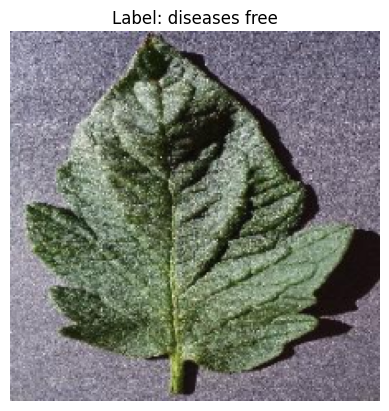

In [6]:
import matplotlib.pyplot as plt

# Check if data is not empty
if len(data) > 0:
    plt.imshow(data[1000])  # Show the first image
    plt.title(f"Label: {labels[1]}")  # Display the label as the title
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("No images found in dataset.")


### Split data here 

In [7]:
# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Encode class names to 0 & 1

# Flatten image data for SVM
data_flattened = data.reshape(len(data), -1)

# Shuffle dataset before splitting
indices = np.arange(len(data))  
np.random.shuffle(indices)  # Shuffle indices

# Apply shuffled indices to data and labels
data_flattened = data_flattened[indices]
labels = labels[indices]

# Split dataset (80% train, 20% test) with shuffling
X_train, X_test, y_train, y_test = train_test_split(
    data_flattened, labels, test_size=0.2, shuffle=True
)

## Train SVM Model 

In [8]:
# Train SVM model
svm_model = SVC(kernel='linear')  # Linear kernel
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

In [11]:
y_pred

array([1, 0, 1, ..., 0, 1, 0], shape=(2001,))

### Check performance 

In [16]:
accuracy = accuracy_score(y_test, y_pred)
round(accuracy*100,2)

75.71

### Save Model

In [15]:
# Save trained model to a .pkl file
with open("svm_model.pkl", "wb") as file:
    pickle.dump(svm_model, file)

print("Model saved as 'svm_model.pkl'")

Model saved as 'svm_model.pkl'


### Loading SVM model

In [17]:
# Load the saved model
with open("svm_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

# predictions = loaded_model.predict(X_test)

Model loaded successfully!


### Check model manually with picture

In [18]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)  # Read image
    if image is None:
        raise ValueError(f"Error loading image: {image_path}")
    
    image = cv2.resize(image, (224, 224))  # Resize to match training size
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = image / 255.0  # Normalize (0-1 scale)
    image = image.flatten()  # Flatten image (for SVM input)
    
    return np.array(image).reshape(1, -1)


In [27]:
# Paths of two images for testing
image1_path = "sample DF.jpg"
image2_path = "sample DP.jpg"

# Preprocess images
img1 = preprocess_image(image1_path)
img2 = preprocess_image(image2_path)

# Predict using the loaded model
prediction1 = loaded_model.predict(img1)
prediction2 = loaded_model.predict(img2)

print(f"Prediction for Image 1 , is {"diseases free" if prediction1[0] == 0 else 'diseased present'}")
print(f"Prediction for Image 2, is {"diseases free" if prediction2[0] == 0 else 'diseased present'}")

Prediction for Image 1 , is diseases free
Prediction for Image 2, is diseased present
